In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()
print(df.shape)

(10000, 14)


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()#Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()#Checking for Duplicates rows

0

In [7]:
df['Exited'].value_counts()#For checking how manys has left the bank

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)#Train data is 80% and test is 20%

In [16]:
X#Input Columns

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
y#Exitd Columns

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
X_train.shape

(8000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [47]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()

#model.add(Dense(3,activation='sigmoid',input_dim=11))
#model.add(Dense(1,activation='sigmoid'))
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#model.compile(loss='binary_crossentropy',optimizer='Adam')
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [52]:
#model.fit(X_train_scaled,y_train,epochs=10)
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7498 - loss: 0.5977 - val_accuracy: 0.7962 - val_loss: 0.4991
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4784 - val_accuracy: 0.8094 - val_loss: 0.4487
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8109 - loss: 0.4337 - val_accuracy: 0.8144 - val_loss: 0.4297
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8135 - loss: 0.4232 - val_accuracy: 0.8194 - val_loss: 0.4200
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.4255 - val_accuracy: 0.8188 - val_loss: 0.4145
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.4061 - val_accuracy: 0.8263 - val_loss: 0.4075
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8375 - loss: 0.3961 - val_accuracy: 0.8288 - val_loss: 0.4021
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3894 - val_accu

In [26]:
model.layers[0].get_weights()

[array([[-0.4599748 , -0.5017362 ,  0.12378176,  0.08739993,  0.08595277,
          0.49158645,  0.01819826,  0.07760016, -0.3972343 ,  0.19922164,
         -0.01866037],
        [-0.30278578, -0.40740046, -0.3500845 ,  0.9112095 , -0.00523396,
         -0.21430337,  0.4768129 ,  0.07835823, -0.11538742, -0.55486435,
          0.6775192 ],
        [-0.32769385,  0.08065464,  0.02024115,  0.16193834,  0.3963191 ,
         -0.20665976, -0.14072986,  0.40039936, -0.4466401 , -0.28969336,
          0.11851735],
        [ 0.13323195, -0.53510875,  0.49041808,  0.59628   , -0.50473595,
         -0.10787417, -0.17238812, -0.35801274,  0.432315  , -0.06496593,
         -0.15101367],
        [ 0.86502   ,  0.42396936, -0.6576437 ,  1.0278624 , -0.8176458 ,
          0.5461077 , -0.9393746 , -0.12137472, -0.04409596,  0.01449127,
          0.01808259],
        [-0.14981675,  0.13567194, -0.11080007,  0.05952809,  0.19945927,
          0.5113216 , -0.01594041,  0.31053707, -0.38340354, -0.0042181

In [39]:
model.layers[1].get_weights()

[array([[ 2.69824207e-01, -6.49339855e-02, -3.00867170e-01,
         -4.78437662e-01,  5.03315747e-01,  5.07725656e-01,
          2.27327049e-01,  3.63481045e-03,  5.06851137e-01,
         -3.16918254e-01, -4.46177870e-01],
        [-1.57436222e-01, -4.60679293e-01, -1.78528100e-01,
          3.39226007e-01,  5.12137592e-01, -4.44761187e-01,
         -2.89277792e-01, -4.96201277e-01, -1.38282776e-05,
         -1.75121635e-01,  1.05915964e-01],
        [ 9.02183652e-02, -2.24907398e-02,  2.44497120e-01,
          1.74571157e-01,  4.65291739e-03,  4.56513584e-01,
          4.13556755e-01,  1.07580423e-02, -2.61581272e-01,
          7.25138783e-02, -1.01574302e-01],
        [-4.22709823e-01, -5.05655408e-01, -4.74645704e-01,
          4.45941806e-01, -2.29567111e-01,  4.81312931e-01,
          3.30145359e-01,  3.08876157e-01, -3.14440370e-01,
          1.56229854e-01, -3.24847311e-01],
        [ 2.99231231e-01,  4.99468744e-01, -3.43575716e-01,
         -2.31831700e-01, -9.70761180e-02, -

In [40]:
model.layers[2].get_weights()

[array([[-0.4211512 ],
        [ 0.43903142],
        [-0.31744954],
        [ 0.62205476],
        [ 0.33275288],
        [-0.38418403],
        [ 0.32255906],
        [ 0.33237296],
        [ 0.63945717],
        [-0.6128632 ],
        [-0.17303842]], dtype=float32),
 array([0.], dtype=float32)]

In [41]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.4893662 ],
       [0.6851117 ],
       [0.62245744],
       ...,
       [0.5343664 ],
       [0.5272218 ],
       [0.5019561 ]], dtype=float32)

In [42]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
np.where(y_log>0.5,1,0)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [44]:
y_pred = np.where(y_log>0.5,1,0)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.317

In [53]:
import matplotlib.pyplot as plt

In [54]:
history.history

{'accuracy': [0.7798437476158142,
  0.8010937571525574,
  0.8106250166893005,
  0.819531261920929,
  0.8245312571525574,
  0.8298437595367432,
  0.8359375,
  0.8371875286102295,
  0.8428124785423279,
  0.8462499976158142,
  0.8485937714576721,
  0.8500000238418579,
  0.8532812595367432,
  0.8565624952316284,
  0.8592187762260437,
  0.8570312261581421,
  0.8603125214576721,
  0.8598437309265137,
  0.8584374785423279,
  0.8607812523841858,
  0.8592187762260437,
  0.8618749976158142,
  0.8645312786102295,
  0.8612499833106995,
  0.8620312213897705,
  0.862500011920929,
  0.8614062666893005,
  0.8643749952316284,
  0.8637499809265137,
  0.8646875023841858,
  0.86328125,
  0.8643749952316284,
  0.8637499809265137,
  0.8635937571525574,
  0.8639062643051147,
  0.8634374737739563,
  0.8653125166893005,
  0.8648437261581421,
  0.8648437261581421,
  0.8656250238418579,
  0.8639062643051147,
  0.8662499785423279,
  0.864062488079071,
  0.8646875023841858,
  0.8631250262260437,
  0.86765623092651

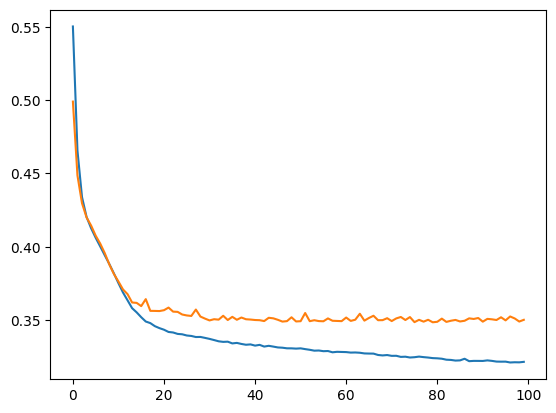

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

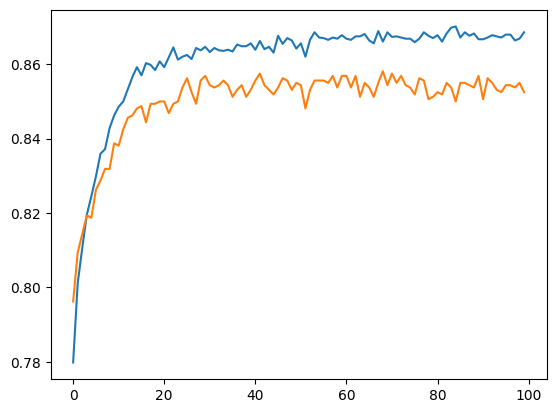

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])